In [2]:
from fastai import *
from fastai.vision import *

In [3]:
classes = ['Male','Female']

In [7]:
folder = 'Male'
file = 'male.txt'

path = Path('data/Gender')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

download_images(file, dest, max_pics = 200)

In [8]:
folder = 'Female'
file = 'female.txt'

path = Path('data/Gender')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

download_images(file, dest, max_pics = 200)

In [9]:
for c in classes :
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, 
                                 ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

In [12]:
data.classes

['Female', 'Male']

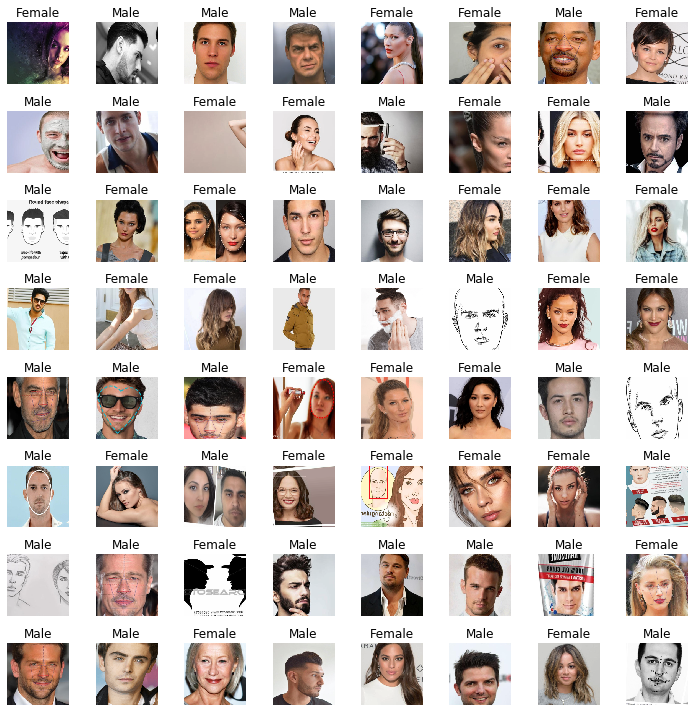

In [18]:
data.show_batch(rows = 100, figsize = (10,10))

In [19]:
learn = cnn_learner(data, models.resnet50, metrics = [error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Asus/.cache\torch\checkpoints\resnet50-19c8e357.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102502400/102502400 [00:59<00:00, 1709711.44it/s]


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time


In [27]:
learn.save('stage-1')

In [28]:
learn.unfreeze()

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:62] data. DefaultCPUAllocator: not enough memory: you tried to allocate %dGB. Buy new RAM!0


In [ ]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, max_lr = slice(1e-5,1e-4))

NameError: name 'learn' is not defined

In [16]:
learn.save('stage-2')

NameError: name 'learn' is not defined

In [17]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

NameError: name 'learn' is not defined

In [18]:
img = open_image('ronaldo.jpg')
img

NameError: name 'open_image' is not defined

In [19]:
classes = ['Female','Male']

data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet50)
learn.load('stage-2')

pred_class,pred_idx,outputs = learn.predict(img)

NameError: name 'ImageDataBunch' is not defined

In [20]:
pred_class

NameError: name 'pred_class' is not defined